# Importing Packages & Setting Color Palette

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import networkx as nx
from matplotlib.pyplot import figure


%matplotlib inline
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("darkgrid", {"axes.facecolor": ".93"})

palette = [ '#00BFC4' ,'#F8766D', '#0085C7', '#000000', "#FFCE54", '#A1469E']
sns.set_palette(palette)

# Loading & Viewing the Data

In [2]:
# Dataset: https://www.kaggle.com/CooperUnion/anime-recommendations-database


anime = pd.read_csv(r'C:\Users\Ferdous Hasan\Downloads\DATA DATA DATA (BA)\anime.csv')
rating = pd.read_csv(r'C:\Users\Ferdous Hasan\Downloads\DATA DATA DATA (BA)\rating.csv')

In [3]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
print(anime.columns)

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')


In [5]:
print(rating.columns)

Index(['user_id', 'anime_id', 'rating'], dtype='object')


# Exploratory Visualization

In [6]:
# 25th Percentile
def q25(x):
    return x.quantile(0.25)

# 75th Percentile
def q75(x):
    return x.quantile(0.75)

percetile_25 = q25(anime['rating'])
percetile_75 = q75(anime['rating'])
mean = anime['rating'].mean()
median = anime['rating'].median()

C:\Users\Ferdous Hasan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


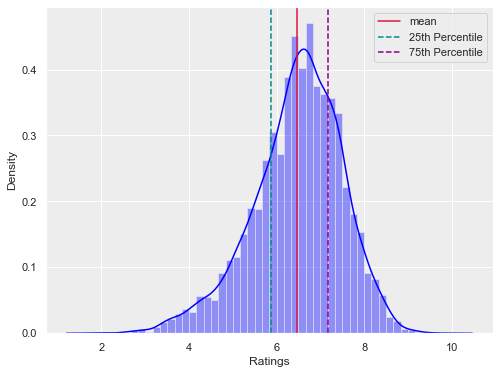

In [7]:
# make a side by side comparision of the rating of people

sns.distplot(anime.rating, color = 'blue').set(xlabel= 'Ratings')

plt.axvline(mean, 0,1, color = '#DC143C' , label = 'mean')
plt.axvline(percetile_25, 0,1, color = '#008B8B' , linestyle="--", label = '25th Percentile')
plt.axvline(percetile_75, 0,1, color = '#8B008B', linestyle="--", label = '75th Percentile')

plt.legend(loc='upper right')

plt.savefig('Rating_Variable', dpi = 300)

In [8]:
print(mean)
print(median)
print(percetile_25)
print(percetile_75)

6.473901690981445
6.57
5.88
7.18


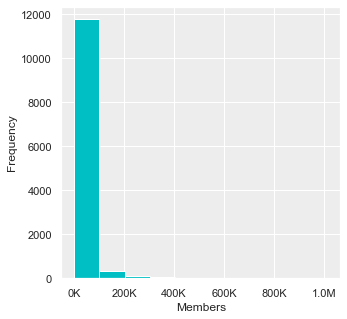

In [9]:
def format_number(data_value, indx):
    if data_value >= 1_000_000:
        formatter = '{:1.1f}M'.format(data_value*0.000_001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter 

fig, ax = plt.subplots(figsize = (5,5))
plt.hist(anime.members)
ax.xaxis.set_major_formatter(format_number)

plt.xlabel('Members')
plt.ylabel('Frequency')

plt.savefig('Member_Dist_Raw', dpi = 300)

In [10]:
percetile_25 = q25(anime['members'])
percetile_75 = q75(anime['members'])
mean = anime['members'].mean()
median = anime['members'].median()

print(mean)
print(median)
print(percetile_25)
print(percetile_75)

18071.33886448674
1550.0
225.0
9437.0


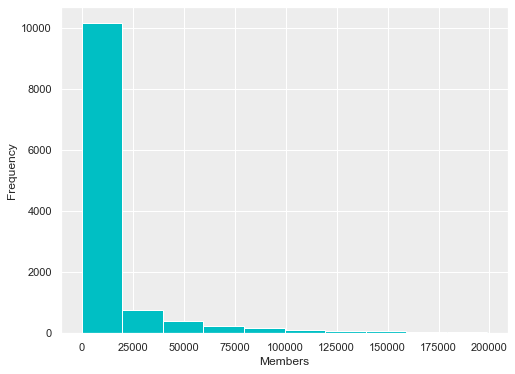

In [11]:
most_anime = anime.loc[anime['members'] <= 200000]

plt.hist(most_anime.members)
plt.xlabel('Members')
plt.ylabel('Frequency')

plt.savefig('Member_Dist_Focused', dpi = 300)

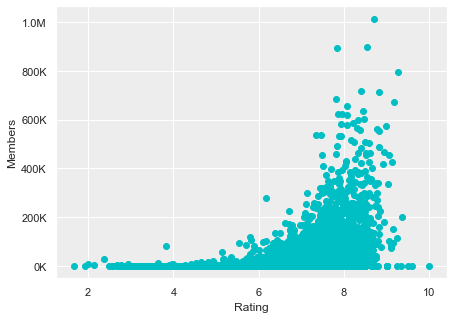

In [12]:
fig, ax = plt.subplots(figsize = (7,5))

plt.scatter(anime.rating, anime.members)
ax.yaxis.set_major_formatter(format_number)
plt.xlabel('Rating')
plt.ylabel('Members')


plt.savefig('Rating_vs_Members', dpi = 300)

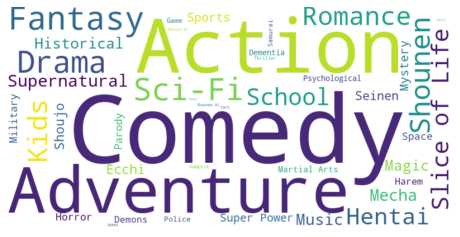

In [13]:
anime_2 = anime.copy()
anime_2.dropna(inplace=True)

from collections import defaultdict
all_genres = defaultdict(int)

for genres in anime_2['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1

from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

plt.savefig('Genre_Word_Cloud', dpi = 300)

In [14]:
def count_genres(df):
    amount_of_genres = []
    df['genre'] = df['genre'].astype(str)
    for genre in df['genre']:
        if genre != 'NaN':
            count = len(genre.split(','))
            amount_of_genres.append(count)
        else:
            amount_of_genres.append(-1)
    return amount_of_genres

anime['Number_Genres'] = count_genres(anime)

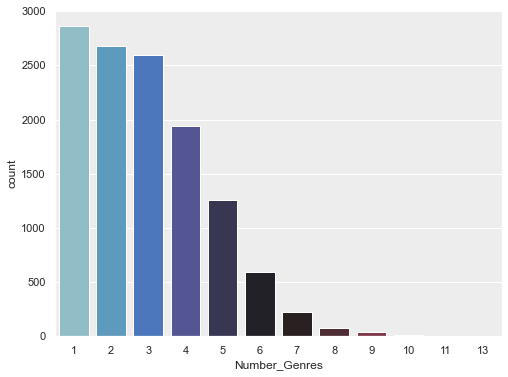

In [15]:
sns.countplot(x="Number_Genres", data=anime, palette="icefire")
plt.savefig('Number_Genres', dpi = 300)

In [16]:
anime.Number_Genres.value_counts()

1     2866
2     2677
3     2599
4     1940
5     1261
6      595
7      228
8       73
9       40
10      12
11       2
13       1
Name: Number_Genres, dtype: int64

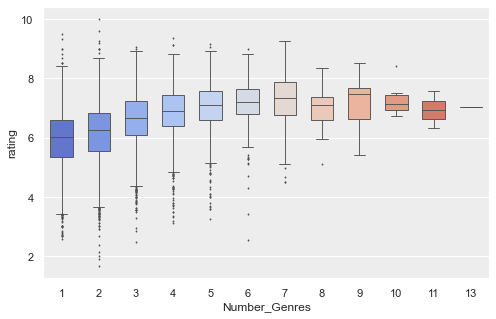

In [17]:
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.boxplot(x="Number_Genres", y="rating", data=anime, palette = 'coolwarm', width=0.6, fliersize=1, linewidth=0.9)

plt.savefig('Number_Genres_Rating', dpi = 300)

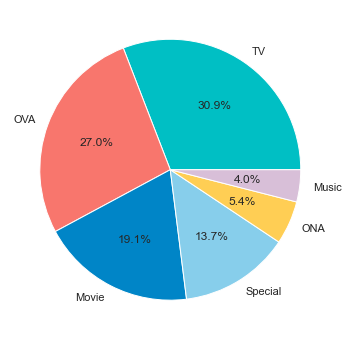

In [18]:
type_release = anime.type.value_counts()
palette = [ '#00BFC4' ,'#F8766D', '#0085C7', 'skyblue', "#FFCE54", 'thistle']
sns.set_palette(palette)
plt.pie(type_release, autopct='%.1f%%', labels = type_release.index)

plt.savefig('Number_Genres_Rating', dpi = 300)

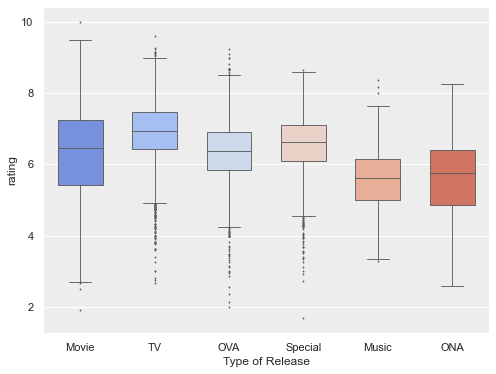

In [19]:
sns.boxplot(data=anime, x='type', y='rating',  palette = 'coolwarm', width=0.6, fliersize=1, linewidth=0.9)
plt.xlabel('Type of Release')
plt.savefig('Release_rating', dpi = 300)

<ipython-input-20-812b287c1214>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  know_episodes['episodes'] = know_episodes['episodes'].astype(int)


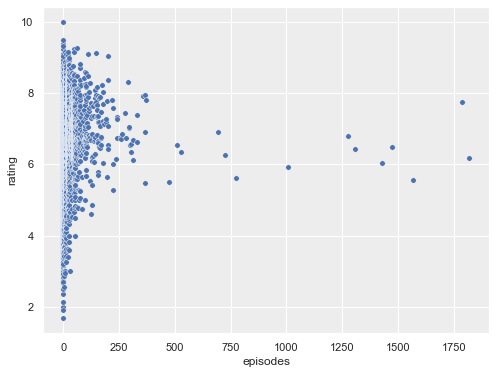

In [20]:
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("darkgrid", {"axes.facecolor": ".93"})

know_episodes = anime[anime['episodes']!='Unknown']
know_episodes['episodes'] = know_episodes['episodes'].astype(int)

sns.scatterplot(x="episodes", y="rating",data=know_episodes.sort_values('episodes'), s=30)

plt.savefig('Episode_VS_Rating', dpi = 300)

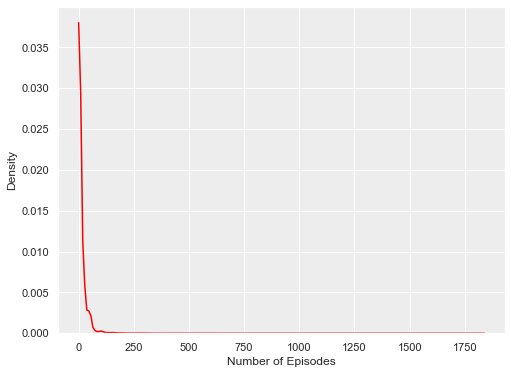

In [21]:
sns.kdeplot(x="episodes", data=know_episodes.sort_values('episodes'), color = 'red', clip=(0.0, 2000))

plt.xlabel('Number of Episodes')

plt.savefig('Episode_Distribution', dpi = 300)

In [22]:
know_episodes.sort_values('episodes').episodes.max()

1818

In [23]:
know_episodes.sort_values('episodes').episodes.mean()

12.382549774134182

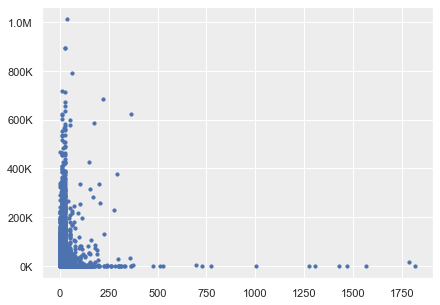

In [24]:
fig, ax = plt.subplots(figsize = (7,5))
plt.scatter(x="episodes", y="members",data=know_episodes.sort_values('episodes'), s=10)
ax.yaxis.set_major_formatter(format_number)

# Exploratory Analysis

In [25]:
from statistics import mean

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as multi

In [26]:
anime.describe(include = 'all')

,anime_id,name,genre,type,episodes,rating,members,Number_Genres
count,12294.000000,12294,12294,12269,12294,12064.000000,1.229400e+04,12294.000000
unique,NaN,12292,3265,6,187,NaN,NaN,NaN
top,NaN,Shi Wan Ge Leng Xiaohua,Hentai,TV,1,NaN,NaN,NaN
freq,NaN,2,823,3787,5677,NaN,NaN,NaN
mean,14058.221653,NaN,NaN,NaN,NaN,6.473902,1.807134e+04,2.956483
std,11455.294701,NaN,NaN,NaN,NaN,1.026746,5.482068e+04,1.667606
min,1.000000,NaN,NaN,NaN,NaN,1.670000,5.000000e+00,1.000000
25%,3484.250000,NaN,NaN,NaN,NaN,5.880000,2.250000e+02,2.000000
50%,10260.500000,NaN,NaN,NaN,NaN,6.570000,1.550000e+03,3.000000
75%,24794.500000,NaN,NaN,NaN,NaN,7.180000,9.437000e+03,4.000000


In [27]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       12294 non-null  int64  
 1   name           12294 non-null  object 
 2   genre          12294 non-null  object 
 3   type           12269 non-null  object 
 4   episodes       12294 non-null  object 
 5   rating         12064 non-null  float64
 6   members        12294 non-null  int64  
 7   Number_Genres  12294 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 768.5+ KB


In [28]:
rating.describe(include = 'all')

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [29]:
# No. of Genres VS Rating ANOVA

anime_2 = anime[['Number_Genres', 'rating']]

model = smf.ols('rating ~ C(Number_Genres)' , data = anime_2).fit()
aov_table = anova_lm(model, typ = 2)

print(aov_table)

                        sum_sq       df           F  PR(>F)
C(Number_Genres)   2396.434826     11.0  254.408918     0.0
Residual          10320.476022  12052.0         NaN     NaN


In [30]:
scipy.stats.f.ppf(0.95, 12, 12281)

1.7529591431030271

In [31]:
# Release Type VS Rating ANOVA

anime_2 = anime[['type', 'rating']]

model = smf.ols('rating ~ C(type)' , data = anime_2).fit()
aov_table = anova_lm(model, typ = 2)

print(aov_table)

                sum_sq       df           F  PR(>F)
C(type)    1597.554709      5.0  346.482556     0.0
Residual  11119.356139  12058.0         NaN     NaN


In [32]:
scipy.stats.f.ppf(0.95, 5, 12288)

2.214826747649761

In [50]:
# Correlation Between Factors
mr=anime.loc[:,['anime_id', 'rating', 'members' , 'Number_Genres' ]]
mr

,anime_id,rating,members,Number_Genres
0,32281,9.37,200630,4
1,5114,9.26,793665,7
2,28977,9.25,114262,7
3,9253,9.17,673572,2
4,9969,9.16,151266,7
...,...,...,...,...
12289,9316,4.15,211,1
12290,5543,4.28,183,1
12291,5621,4.88,219,1
12292,6133,4.98,175,1


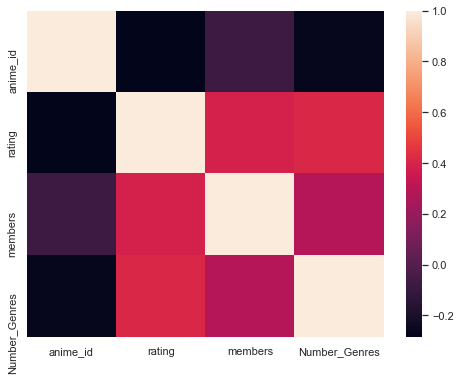

In [51]:
mr1=mr.corr()
sns.heatmap(mr1)
plt.savefig('Correl_Matrix', dpi = 300)

In [52]:
mr1

,anime_id,rating,members,Number_Genres
anime_id,1.000000,-0.284625,-0.080071,-0.268785
rating,-0.284625,1.000000,0.387979,0.416298
members,-0.080071,0.387979,1.000000,0.289765
Number_Genres,-0.268785,0.416298,0.289765,1.000000


In [ ]:
plotScatterMatrix(anime, 9, 10)

In [40]:
# Correlation Between Genres

dummies = pd.get_dummies(anime['genre'].str.get_dummies(sep=','))

matrix = np.asmatrix(dummies.corr())
G = nx.from_numpy_matrix(matrix)


def create_corr_network(G, corr_direction, min_correlation):
    H = G.copy()
    for stock1, stock2, weight in G.edges(data=True):
        if corr_direction == "positive":
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        else:
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])
    d = nx.degree(H)
    nodelist, node_sizes = zip(*d)
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(10,8), dpi=100)

    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           node_size=tuple([x**2 for x in node_sizes]),alpha=0.8)
    
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    if corr_direction == "positive": edge_colour = plt.cm.GnBu 
    else: edge_colour = plt.cm.PuRd
        
    nx.draw_networkx_edges(H, positions, edgelist= None,style='dashed',
                          width= weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')

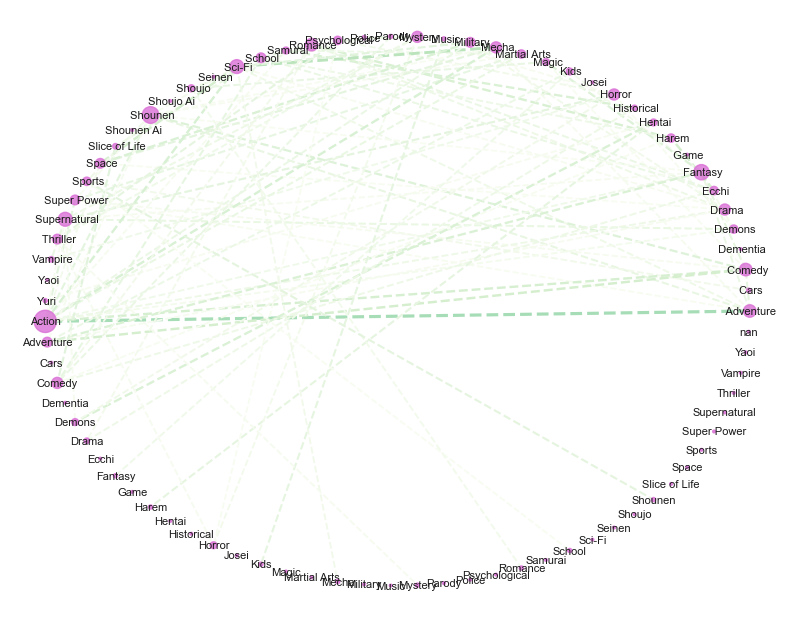

In [41]:
sns.set_style("darkgrid", {"axes.facecolor": "1"})

corr = dummies.corr() 
stocks = corr.index.values 
csr_matrix = np.asmatrix(corr) 
G = nx.from_numpy_matrix(csr_matrix) 
G = nx.relabel_nodes(G,lambda x: stocks[x]) 
G.edges(data=True) 
create_corr_network(G, 'positive', 0.1)
plt.savefig('Genre_Network', dpi = 300)

# Data Transformation

In [34]:
rating.rating.unique()

array([-1, 10,  8,  6,  9,  7,  3,  5,  4,  1,  2], dtype=int64)

In [35]:
rating['rating'].value_counts()

 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: rating, dtype: int64

In [36]:
df = pd.merge(anime,rating,on='anime_id',suffixes= ['', '_user'])
df = df.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})
df.tail()

,anime_id,anime_title,genre,type,episodes,rating,members,Number_Genres,user_id,user_rating
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,1,39532,-1
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,1,48766,-1
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,1,60365,4
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,1,27364,-1
7813726,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,1,48766,-1


In [37]:
df.shape[0]

7813727

# ML (Unsupervised ML)

In [38]:
#from sklearn

In [39]:
# KNN/ Cosine Similarity/ Maxtrix Factorization for Collaborative Filtering